<a href="https://colab.research.google.com/github/serebris/LIS501_NLP_SongAnalysis/blob/main/SongsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part One

    Get the dataset loaded.
    Across all of the songs in the dataset, identify:
        the top 20  most frequent tokens
        the top 20  most frequent stems
        the top 20  most frequent verbs
    In a paragraph, report: Were you surprised by the results? Why or why not?


In [ ]:
import nltk
import numpy as np
import pandas as pd
import spacy
nlp = spacy.load( "en_core_web_sm", disable=["parser", "ner"] )

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving h_artists_songs.csv to h_artists_songs.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['h_artists_songs.csv']))
# Dataset is now stored in a Pandas Dataframe
df1.head(3)

,Artist_Name,Song_Title,Year,Lyrics_URL,Lyrics
0,H1GHR MUSIC,H1GHR,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/h1g...,\n\r\nH1GHR\nH1GHR\nH1GHR\n\nThe clique gettin...
1,H1GHR MUSIC,Melanin Handsome,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/mel...,\n\n[Romanized:]\n\nNone of your business\nEot...
2,H1GHR MUSIC,How We Rock,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/how...,\n\n[Romanized:]\n\nThis is how we rock yeah\n...


In [ ]:
df1['Lyrics'] = df1['Lyrics'].str.lower()
df1.head(3)
#all lyrics are in lower-case

,Artist_Name,Song_Title,Year,Lyrics_URL,Lyrics
0,H1GHR MUSIC,H1GHR,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/h1g...,\n\r\nh1ghr\nh1ghr\nh1ghr\n\nthe clique gettin...
1,H1GHR MUSIC,Melanin Handsome,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/mel...,\n\n[romanized:]\n\nnone of your business\neot...
2,H1GHR MUSIC,How We Rock,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/how...,\n\n[romanized:]\n\nthis is how we rock yeah\n...


In [ ]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df1['Lyrics_token']=df1['Lyrics'].apply(regexp.tokenize)
df1.head(3)

,Artist_Name,Song_Title,Year,Lyrics_URL,Lyrics,Lyrics_token
0,H1GHR MUSIC,H1GHR,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/h1g...,\n\r\nh1ghr\nh1ghr\nh1ghr\n\nthe clique gettin...,"[h1ghr, h1ghr, h1ghr, the, clique, getting, bi..."
1,H1GHR MUSIC,Melanin Handsome,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/mel...,\n\n[romanized:]\n\nnone of your business\neot...,"[romanized, none, of, your, business, eotteon,..."
2,H1GHR MUSIC,How We Rock,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/how...,\n\n[romanized:]\n\nthis is how we rock yeah\n...,"[romanized, this, is, how, we, rock, yeah, h1g..."


In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with custom stopwords
my_stopwords = ['h1ghr', 'romanized', '[^a-zA-Z0-9]+'] #non-English letters
stopwords.extend(my_stopwords)

In [ ]:
# Remove stopwords
df1['Lyrics_token'] = df1['Lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords])
df1.head(3)

,Artist_Name,Song_Title,Year,Lyrics_URL,Lyrics,Lyrics_token
0,H1GHR MUSIC,H1GHR,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/h1g...,\n\r\nh1ghr\nh1ghr\nh1ghr\n\nthe clique gettin...,"[clique, getting, big, bring, bigger, table, w..."
1,H1GHR MUSIC,Melanin Handsome,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/mel...,\n\n[romanized:]\n\nnone of your business\neot...,"[none, business, eotteon, bangbeobi, dwaetdeun..."
2,H1GHR MUSIC,How We Rock,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/how...,\n\n[romanized:]\n\nthis is how we rock yeah\n...,"[rock, yeah, never, stops, yeah, busy, stackin..."


In [ ]:
df1['Lyrics_string'] = df1['Lyrics_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df1[['Lyrics', 'Lyrics_token', 'Lyrics_string']].head()
#change the format of Lyrics_token to strings and keep only words which are longer than 2 letters

,Lyrics,Lyrics_token,Lyrics_string
0,\n\r\nh1ghr\nh1ghr\nh1ghr\n\nthe clique gettin...,"[clique, getting, big, bring, bigger, table, w...",clique getting big bring bigger table win name...
1,\n\n[romanized:]\n\nnone of your business\neot...,"[none, business, eotteon, bangbeobi, dwaetdeun...",none business eotteon bangbeobi dwaetdeun gane...
2,\n\n[romanized:]\n\nthis is how we rock yeah\n...,"[rock, yeah, never, stops, yeah, busy, stackin...",rock yeah never stops yeah busy stacking guap ...
3,\n\n[romanized:]\n\ntoo many hustlers' here\no...,"[many, hustlers, ojik, tageona, jukgeona, uri,...",many hustlers ojik tageona jukgeona uri tim pp...
4,\n\n[romanized:]\n\nh1ghr than the sky so fire...,"[sky, fire, yes, feeling, blazed, fish, compli...",sky fire yes feeling blazed fish compliments a...


In [ ]:
lyricArray= df1["Lyrics"].tolist()

In [ ]:
all_words = ' '.join([word for word in df1['Lyrics_string']])
# joining all the words together

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [ ]:
#a frequency distribution which records the number of times each word has occurred
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist.most_common(20)

[('love', 51913),
 ('know', 48188),
 ('like', 44296),
 ('got', 38141),
 ('na', 31243),
 ('get', 27606),
 ('one', 27151),
 ('let', 26094),
 ('yeah', 26018),
 ('never', 25780),
 ('time', 25672),
 ('see', 23262),
 ('baby', 21770),
 ('way', 21367),
 ('come', 20800),
 ('want', 20272),
 ('back', 19933),
 ('cause', 19585),
 ('say', 19452),
 ('make', 18756)]

Most common tokens: ('love', 51913), ('know', 48188), ('like', 44296), ('got', 38141), ('na', 31243), ('get', 27606), ('one', 27151), ('let', 26094), ('yeah', 26018), ('never', 25780), ('time', 25672), ('see', 23262), ('baby', 21770), ('way', 21367), ('come', 20800), ('want', 20272), ('back', 19933), ('cause', 19585), ('say', 19452), ('make', 18756)

In [ ]:
df1['Lyrics_string_fdist'] = df1['Lyrics_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 4 ]))
# deleting the words that apper less than 4 times

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df1['Lyrics_string_lem'] = df1['Lyrics_string_fdist'].apply(wordnet_lem.lemmatize)

In [ ]:
all_words_lem = ' '.join([word for word in df1['Lyrics_string_lem']])

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [ ]:
fd.most_common(20) #most common lemmas

[('love', 51913),
 ('know', 48188),
 ('like', 44296),
 ('got', 30870),
 ('get', 27606),
 ('one', 27151),
 ('let', 26094),
 ('yeah', 26018),
 ('never', 25780),
 ('time', 25672),
 ('see', 23262),
 ('baby', 21770),
 ('way', 21367),
 ('come', 20800),
 ('want', 20272),
 ('back', 19933),
 ('cause', 19585),
 ('say', 19452),
 ('make', 18756),
 ('take', 18400)]

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
part_of_speech_words = nltk.pos_tag(words)
part_of_speech_words

In [ ]:
part_of_speech_words

In [ ]:
import nltk
nltk.download('tagsets')
print(nltk.help.upenn_tagset())
#figuring out which ones are the verbs

[nltk_data] Downloading package tagsets to /root/nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data]   Unzipping help/tagsets.zip.


In [ ]:
verbWords = [token[0] for token in part_of_speech_words if token[1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'] ]
frequencyVerb = nltk.FreqDist(verbWords)

In [ ]:
frequencyVerb.most_common(20) #Most common verbs

[('know', 38963),
 ('got', 29543),
 ('love', 21843),
 ('get', 21496),
 ('say', 18939),
 ('see', 17333),
 ('want', 16559),
 ('make', 16336),
 ('take', 15933),
 ('come', 15840),
 ('let', 14034),
 ('said', 9966),
 ('think', 9031),
 ('need', 8709),
 ('keep', 8637),
 ('feel', 7861),
 ('gone', 7385),
 ('tell', 7285),
 ('find', 7067),
 ('made', 6594)]

In a paragraph, report: Were you surprised by the results? Why or why not?

We were not surprised by the results. We expected most songs to talk about love, which was in our top words and lemmas. When it comes to verbs, all of the verbs are extremely common and simple.

# Part Two

    How would you expect these lists to change if we had isolated a given genre? a different year?
        Complete the same task as part 1 BUT
            Only including the lyrics of 5 artists from your favorite genre OR
            Only include the lyrics of all songs from a single year
    In a paragraph, compare your results from Part 2 to those from Part 1. How much overlap is there?


In [ ]:
# 20 most frequent tokens. The df here is df2, which will only contain songs from 2020

In [ ]:
df2 = df1.query('Year == 2020') #Selecting songs from the year 2020
all_words2 = ' '.join([word for word in df2['Lyrics_string']]) #Repurposing code for freq dist

tokenized_words2 = nltk.tokenize.word_tokenize(all_words2)
from nltk.probability import FreqDist #The new freq dist for 2020 songs

fdist2 = FreqDist(tokenized_words2)

In [ ]:
fdist2.most_common(20) #20 Tokens for df2

[('know', 2963),
 ('like', 2797),
 ('love', 2541),
 ('got', 2462),
 ('na', 2232),
 ('yeah', 2228),
 ('get', 1837),
 ('never', 1665),
 ('let', 1599),
 ('one', 1543),
 ('time', 1457),
 ('wan', 1423),
 ('want', 1359),
 ('die', 1265),
 ('ich', 1230),
 ('see', 1187),
 ('back', 1181),
 ('feel', 1170),
 ('way', 1151),
 ('cause', 1145)]

In [ ]:
#20 most frequent lemmas

In [ ]:
df2['Lyrics_string_fdist'] = df2['Lyrics_token'].apply(lambda x: ' '.join([item for item in x if fdist2[item] >= 4 ]))
# deleting the words that apper less than 4 times

<ipython-input-53-d27203d2c828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lyrics_string_fdist'] = df2['Lyrics_token'].apply(lambda x: ' '.join([item for item in x if fdist2[item] >= 4 ]))


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

#Lemmatizing df2
from nltk.stem import WordNetLemmatizer
wordnet_lem2 = WordNetLemmatizer()
df2['Lyrics_string_lem'] = df2['Lyrics_string_fdist'].apply(wordnet_lem2.lemmatize)
all_words_lem2 = ' '.join([word for word in df2['Lyrics_string_lem']])

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words2 = nltk.word_tokenize(all_words_lem2)
fd2 = FreqDist(words2)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-54-c6821f62e0f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lyrics_string_lem'] = df2['Lyrics_string_fdist'].apply(wordnet_lem2.lemmatize)


In [ ]:
fd2.most_common(20) # 20 Lemmas

[('know', 2963),
 ('like', 2797),
 ('love', 2541),
 ('yeah', 2228),
 ('got', 1934),
 ('get', 1837),
 ('never', 1665),
 ('let', 1599),
 ('one', 1543),
 ('time', 1457),
 ('want', 1359),
 ('die', 1265),
 ('ich', 1230),
 ('see', 1187),
 ('back', 1181),
 ('feel', 1170),
 ('way', 1151),
 ('cause', 1145),
 ('make', 1142),
 ('baby', 1109)]

In [ ]:
# 20 Most common verbs

In [ ]:
part_of_speech_words2 = nltk.pos_tag(words2)

verbWords2 = [token[0] for token in part_of_speech_words2 if token[1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'] ]
frequencyVerb2 = nltk.FreqDist(verbWords2)

In [ ]:
frequencyVerb2.most_common(20) #most common verbs

[('know', 2488),
 ('got', 1869),
 ('get', 1452),
 ('want', 1093),
 ('say', 999),
 ('love', 995),
 ('make', 987),
 ('see', 892),
 ('let', 855),
 ('take', 847),
 ('come', 829),
 ('think', 603),
 ('feel', 571),
 ('need', 543),
 ('keep', 502),
 ('turn', 422),
 ('give', 418),
 ('said', 416),
 ('les', 415),
 ('tell', 404)]

In a paragraph, compare your results from Part 2 to those from Part 1. How much overlap is there?

There is a fair amount of overlap. Words like 'Love' and 'Baby' are still present but not in the same frequency. Basic verbs such as 'like', 'got', 'let'are still present. However, some new words are more frequent in the year 2020 that are not present with the same frequency in the entire corpus. As a whole, 2020 seems to be somewhat representative for the rest of the songs in all other years, but it has enough differences.

# Part Three

- Create a new dataframe that includes only the song lyrics of two artists
- Using one of the artists
- Using 2 of the artists you chose above, compute the cosine similarities of one of their songs against each other song using TF-IDF weighting,
-- TF uses raw term frequency
-- Remember to remove stop words and punctuation
-- Use lowercase word stems
- Investigate your results to be able to explain them.
- In a paragraph, summarize your results. Discuss why the two songs were most alike. What is this analysis able to tell us?

In [ ]:
# Writing a lot of code to come up with a list of all the unique artists

artists = df1['Artist_Name']
artists = artists.tolist()

def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    for x in unique_list:
        print (x)

unique(artists)

H1GHR MUSIC
Ha-Ash
Hackett, Emily
Hackett, Steve
Hackman, Marika
Hacktivist
Haddaway
Haddon, Deitrick
Hadestown Cast
Hadise
Hadouken!
Haenow, Ben
Haerts
HAEVN
Haftbefehl
Hagar, Sammy
Hagen, Rasmus
Haggard
Haggard, Merle
Hailee Steinfeld
Hailey Whitters
Hails, The
Hail The Sun
HAIM
Haircut 100
Hairspray Cast
Haiti Babii
Håkan Hellström
Haken
Hakim, Nick
Hale
Haleco, Migz
Hale, Lucy
Halestorm
Haley, Gavin
Haley Heynderickx
Haley Joelle
Haley Reinhart
Haley Smalls
half•alive
Half-A-Mil
Halflives
Half Moon Run
HalfNoise
Halford, Rob
Halifax
Hal Ketchum
Hall, Aaron
Hall, Daryl
Halle Kearns
Halliwell, Geri
Hall & Oates
Hall, Todrick
Hall, Tom T.
Hall, Trevor
Hallyday, Johnny
Halo Effect, The
Haloo Helsinki!
Halsey
Hamasaki, Ayumi
Hamilton, Anthony
Hamilton Leithauser
Hamilton Park
Hammack, Caylee
HammAli & Navai
HammerFall
Hammitt, Matt
Hammond, Albert
Hammond, Beres
Hammond, Fred
Hammond, Jr., Albert
Hamza
Hande Yener
Hand Habits
Hands Like Houses
Handsome Devil
Handsome Family, The
Handsom

In [ ]:
df3 = df1.query('Artist_Name == "Halsey" or Artist_Name == "Hamza"') #Creating new df of 2 artists

In [ ]:
df3 #df3 contains songs from 2 artists, 'Halsey' and 'Hamza'

,Artist_Name,Song_Title,Year,Lyrics_URL,Lyrics,Lyrics_token,Lyrics_string,Lyrics_string_fdist,Lyrics_string_lem
4234,Halsey,Is There Somewhere?,2014,https://www.azlyrics.com/lyrics/halsey/isthere...,\n\r\nyou were dancing in your tube socks in o...,"[dancing, tube, socks, hotel, room, flashin, e...",dancing tube socks hotel room flashin eyes lik...,dancing tube socks hotel room flashin eyes lik...,dancing tube socks hotel room flashin eyes lik...
4235,Halsey,Ghost,2014,https://www.azlyrics.com/lyrics/halsey/ghost.html,\n\r\ni'm searching for something that i can't...,"[searching, something, reach, like, innocent, ...",searching something reach like innocent want f...,searching something reach like innocent want f...,searching something reach like innocent want f...
4236,Halsey,Hurricane,2014,https://www.azlyrics.com/lyrics/halsey/hurrica...,\n\r\nthere's a place way down in bed-stuy\nwh...,"[place, way, bed, stuy, boy, lives, behind, br...",place way bed stuy boy lives behind bricks got...,place way bed stuy boy lives behind bricks got...,place way bed stuy boy lives behind bricks got...
4237,Halsey,Empty Gold,2014,https://www.azlyrics.com/lyrics/halsey/emptygo...,\n\r\ni; i must confess\nhow hard i tried to b...,"[must, confess, hard, tried, breathe, trees, l...",must confess hard tried breathe trees loneline...,must confess hard tried breathe trees loneline...,must confess hard tried breathe trees loneline...
4238,Halsey,Trouble (Stripped),2014,https://www.azlyrics.com/lyrics/halsey/trouble...,\n\r\nwould you bleed for me?\nlick it off my ...,"[would, bleed, lick, lips, like, needed, would...",would bleed lick lips like needed would sit co...,would bleed lick lips like needed would sit co...,would bleed lick lips like needed would sit co...
...,...,...,...,...,...,...,...,...,...
5476,Hamza,Spider,2021,https://www.azlyrics.com/lyrics/hamza/spider.html,\n\r\nyeah yeah\n\ncontact; j'suis dans la spi...,"[yeah, yeah, contact, j, suis, dans, la, spide...",yeah yeah contact suis dans spider vrr vrr bab...,yeah yeah contact suis dans spider vrr vrr bab...,yeah yeah contact suis dans spider vrr vrr bab...
5477,Hamza,AMG Technology,2021,https://www.azlyrics.com/lyrics/hamza/amgtechn...,\n\r\nouais; ouais\nouais; ouais; ouais; ouais...,"[ouais, ouais, ouais, ouais, ouais, ouais, oka...",ouais ouais ouais ouais ouais ouais okay okay ...,ouais ouais ouais ouais ouais ouais okay okay ...,ouais ouais ouais ouais ouais ouais okay okay ...
5478,Hamza,Hara-Kiri,2021,https://www.azlyrics.com/lyrics/hamza/harakiri...,\n\r\nwow-oh (get 'em down)\nlet's get it; let...,"[wow, oh, get, em, let, get, let, get, let, ge...",wow get let get let get let get woke woke gova...,wow get let get let get let get woke woke gova...,wow get let get let get let get woke woke gova...
5479,Hamza,Jalousie,2021,https://www.azlyrics.com/lyrics/hamza/jalousie...,\n\r\nnouveau réseau dans la ville; les miens ...,"[nouveau, réseau, dans, la, ville, les, miens,...",nouveau réseau dans ville les miens connaissen...,nouveau réseau dans ville les miens connaissen...,nouveau réseau dans ville les miens connaissen...


In [ ]:
# Creating a TF-IDF matrix from df3
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
term_matrix = vectorizer.fit_transform(df3['Lyrics_string_lem'])
term_matrix.shape

(199, 5259)

In [ ]:
# document similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(term_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,1.000000,0.056162,0.036929,0.064472,0.212246,0.015279,0.008270,0.038658,0.056979,0.036929,...,0.000000,0.035405,0.042081,0.000000,0.014330,0.004459,0.000000,0.008224,0.000000,0.030643
1,0.056162,1.000000,0.032342,0.076806,0.040764,0.030180,0.072950,0.018831,0.052547,0.032342,...,0.000962,0.053219,0.006130,0.002744,0.006579,0.003961,0.001963,0.004086,0.005185,0.003590
2,0.036929,0.032342,1.000000,0.037231,0.027196,0.023173,0.007213,0.025619,0.016517,1.000000,...,0.002610,0.028386,0.000000,0.000000,0.002669,0.002515,0.000343,0.002002,0.002518,0.010045
3,0.064472,0.076806,0.037231,1.000000,0.062755,0.006085,0.054604,0.016448,0.036201,0.037231,...,0.004858,0.028028,0.009161,0.001200,0.016538,0.006543,0.000638,0.007451,0.004654,0.000000
4,0.212246,0.040764,0.027196,0.062755,1.000000,0.017453,0.024982,0.014529,0.032804,0.027196,...,0.009321,0.036896,0.004142,0.000000,0.009697,0.004283,0.000000,0.014649,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.004459,0.003961,0.002515,0.006543,0.004283,0.000392,0.000000,0.000000,0.000000,0.002515,...,0.097485,0.037068,0.102716,0.175461,0.088765,1.000000,0.073636,0.092405,0.085003,0.094534
195,0.000000,0.001963,0.000343,0.000638,0.000000,0.000000,0.004480,0.000000,0.003619,0.000343,...,0.049196,0.044711,0.034175,0.051766,0.065699,0.073636,1.000000,0.111589,0.109388,0.087289
196,0.008224,0.004086,0.002002,0.007451,0.014649,0.006680,0.000000,0.000000,0.000000,0.002002,...,0.066219,0.081665,0.075733,0.075038,0.124510,0.092405,0.111589,1.000000,0.056762,0.095803
197,0.000000,0.005185,0.002518,0.004654,0.000000,0.000000,0.007035,0.004828,0.000000,0.002518,...,0.070018,0.041937,0.064373,0.076447,0.094177,0.085003,0.109388,0.056762,1.000000,0.098475


<AxesSubplot:>

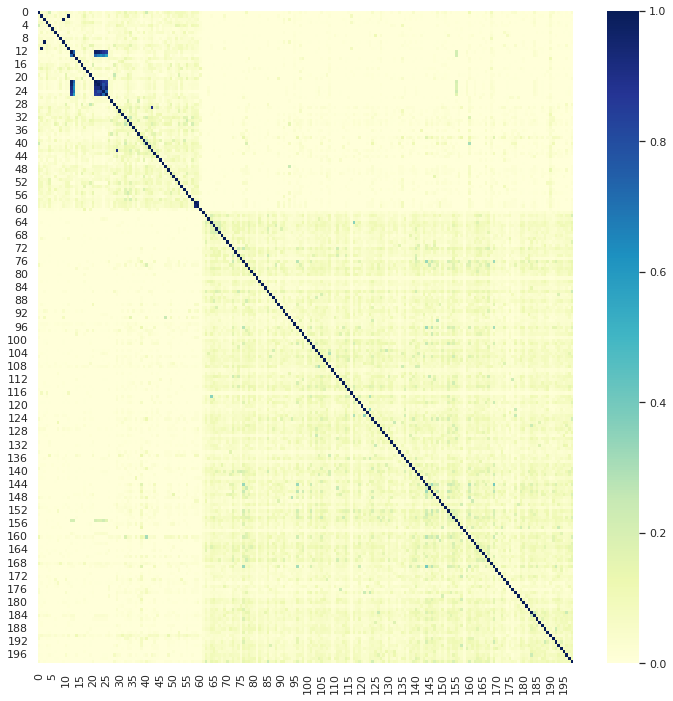

In [ ]:
import seaborn as sns #https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps seaborn heatmap colors

sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(similarity_df, cmap="YlGnBu")

In a paragraph, summarize your results. Discuss why the two songs were most alike. What is this analysis able to tell us?

We found out that from the two artists we chose, their songs most closely relate to their own songs. This makes sense, given that an artist would tend to have a similar theme or focus throughout their songs. Our first artistr, Halsey, has a couple of songs that share a lot of similar words and content, much more than our second artist. We can see this in the dark blue spots of our heatmap.